# Data Visualization and Description for Train Delay Prediction

## First we load the data:

Note that this is the data for one year.

In [ ]:
import numpy as np
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

local_path_to_data = "/Users/mac/Desktop/train_delay_prediction/delay_pred_5_15_numpy_v1/"

with open(f"{local_path_to_data}metadata/columns_scheme.pkl", "rb") as f:
    columns_scheme = pkl.load(f)

months = [f"{y}{m:02d}" for y in [2023] for m in range(1, 13)]

x_data = {}
y_delays_data = {}
y_actions_data = {}
md_data = {}

for month in months:
    x_data[month] = np.load(f"{local_path_to_data}x/x_{month}.npy")
    y_delays_data[month] = np.load(f"{local_path_to_data}y_delays/y_delays_{month}.npy")
    y_actions_data[month] = np.load(f"{local_path_to_data}y_actions/y_actions_{month}.npy")
    md_data[month] = np.load(f"{local_path_to_data}metadata/md_{month}.npy", allow_pickle=True)


Number of unique departure dates: 31
List of unique departure dates:
['01JAN2023' '02JAN2023' '03JAN2023' '04JAN2023' '05JAN2023' '06JAN2023'
 '07JAN2023' '08JAN2023' '09JAN2023' '10JAN2023' '11JAN2023' '12JAN2023'
 '13JAN2023' '14JAN2023' '15JAN2023' '16JAN2023' '17JAN2023' '18JAN2023'
 '19JAN2023' '20JAN2023' '21JAN2023' '22JAN2023' '23JAN2023' '24JAN2023'
 '25JAN2023' '26JAN2023' '27JAN2023' '28JAN2023' '29JAN2023' '30JAN2023'
 '31JAN2023']
Number of unique departure dates: 29
List of unique departure dates:
['01FEB2023' '02FEB2023' '03FEB2023' '04FEB2023' '05FEB2023' '06FEB2023'
 '07FEB2023' '08FEB2023' '09FEB2023' '10FEB2023' '11FEB2023' '12FEB2023'
 '13FEB2023' '14FEB2023' '15FEB2023' '16FEB2023' '17FEB2023' '18FEB2023'
 '19FEB2023' '20FEB2023' '21FEB2023' '22FEB2023' '23FEB2023' '24FEB2023'
 '25FEB2023' '26FEB2023' '27FEB2023' '28FEB2023' '31JAN2023']
Number of unique departure dates: 32
List of unique departure dates:
['01MAR2023' '02MAR2023' '03MAR2023' '04MAR2023' '05MAR2023'

: 

## Description of the data:

- columns_scheme: A file which describes all of the data more clearly, especially useful in the case where the user wants to understand the features of the data points.
- x: Collection of Data Points across 434 features.
- y_delays: Collection of stations of our dataset, in this case 15 stations after the current one for which we wish to predict the delay. 
- y_actions: The actions the train can take; stay in place (0), move to next station (1), move to second next station (2).
- md: Contains the state time, date of departure and train number for further descriptive information.

In [2]:
# It is useful to look at columns_scheme to understand the features
columns_scheme

{'x': {'PAST_DELAYS_5': 0,
  'PAST_DELAYS_4': 1,
  'PAST_DELAYS_3': 2,
  'PAST_DELAYS_2': 3,
  'PAST_DELAYS_1': 4,
  'PAST_TYPES_5_D': 5,
  'PAST_TYPES_4_D': 6,
  'PAST_TYPES_3_D': 7,
  'PAST_TYPES_2_D': 8,
  'PAST_TYPES_1_D': 9,
  'FUTURE_TYPES_1_D': 10,
  'FUTURE_TYPES_2_D': 11,
  'FUTURE_TYPES_3_D': 12,
  'FUTURE_TYPES_4_D': 13,
  'FUTURE_TYPES_5_D': 14,
  'FUTURE_TYPES_6_D': 15,
  'FUTURE_TYPES_7_D': 16,
  'FUTURE_TYPES_8_D': 17,
  'FUTURE_TYPES_9_D': 18,
  'FUTURE_TYPES_10_D': 19,
  'FUTURE_TYPES_11_D': 20,
  'FUTURE_TYPES_12_D': 21,
  'FUTURE_TYPES_13_D': 22,
  'FUTURE_TYPES_14_D': 23,
  'FUTURE_TYPES_15_D': 24,
  'PAST_TYPES_5_A': 25,
  'PAST_TYPES_4_A': 26,
  'PAST_TYPES_3_A': 27,
  'PAST_TYPES_2_A': 28,
  'PAST_TYPES_1_A': 29,
  'FUTURE_TYPES_1_A': 30,
  'FUTURE_TYPES_2_A': 31,
  'FUTURE_TYPES_3_A': 32,
  'FUTURE_TYPES_4_A': 33,
  'FUTURE_TYPES_5_A': 34,
  'FUTURE_TYPES_6_A': 35,
  'FUTURE_TYPES_7_A': 36,
  'FUTURE_TYPES_8_A': 37,
  'FUTURE_TYPES_9_A': 38,
  'FUTURE_TYPES_10_A

For a further understanding of the data we can look at the shape of the x and y_delay matrices.

Those are the ones we will use during our Machine Learning predictions.

In [11]:
for month in months:
    print(f"Month: {month[4:]}")
    print(f"  x shape: {x_data[month].shape}")
    print(f"  y_delays shape: {y_delays_data[month].shape}")

np.mean([x_data[month].shape[0] for month in months])

Month: 01
  x shape: (1757219, 434)
  y_delays shape: (1757219, 15)
Month: 02
  x shape: (1569015, 434)
  y_delays shape: (1569015, 15)
Month: 03
  x shape: (1732341, 434)
  y_delays shape: (1732341, 15)
Month: 04
  x shape: (1559064, 434)
  y_delays shape: (1559064, 15)
Month: 05
  x shape: (1655500, 434)
  y_delays shape: (1655500, 15)
Month: 06
  x shape: (1680949, 434)
  y_delays shape: (1680949, 15)
Month: 07
  x shape: (1601849, 434)
  y_delays shape: (1601849, 15)
Month: 08
  x shape: (1628511, 434)
  y_delays shape: (1628511, 15)
Month: 09
  x shape: (1670885, 434)
  y_delays shape: (1670885, 15)
Month: 10
  x shape: (1733234, 434)
  y_delays shape: (1733234, 15)
Month: 11
  x shape: (1554424, 434)
  y_delays shape: (1554424, 15)
Month: 12
  x shape: (1586398, 434)
  y_delays shape: (1586398, 15)


1644115.75

During our analysis we will try to reduce features for the sake of computational expenses and to try to find the most influencial features.

/var/folders/z6/_mfrnglj7h161j5389c53l_m0000gn/T/ipykernel_42337/2945218924.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates_of_departure = pd.to_datetime(md[:, 1], errors="coerce")


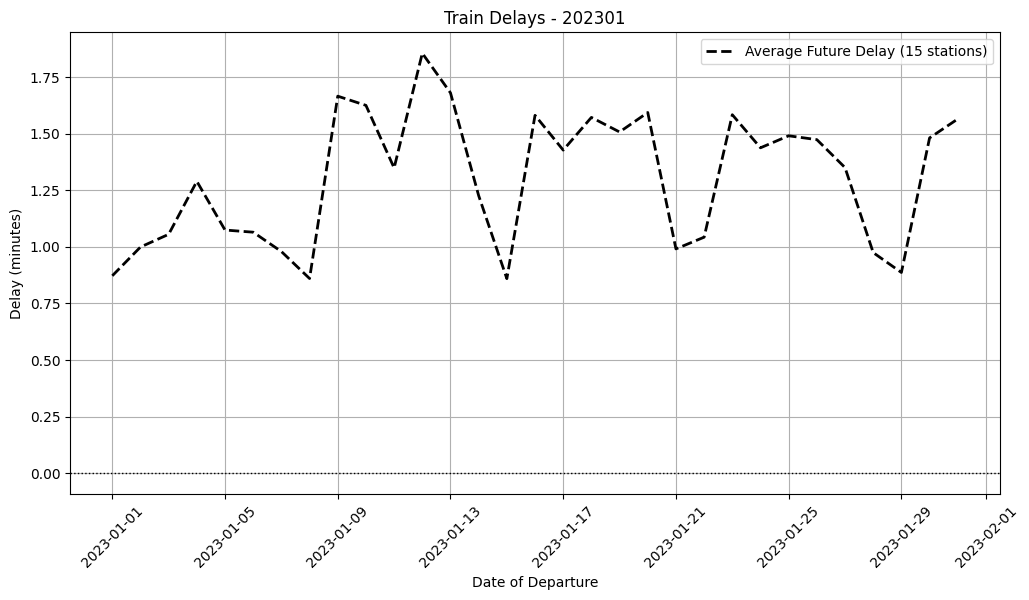

/var/folders/z6/_mfrnglj7h161j5389c53l_m0000gn/T/ipykernel_42337/2945218924.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates_of_departure = pd.to_datetime(md[:, 1], errors="coerce")


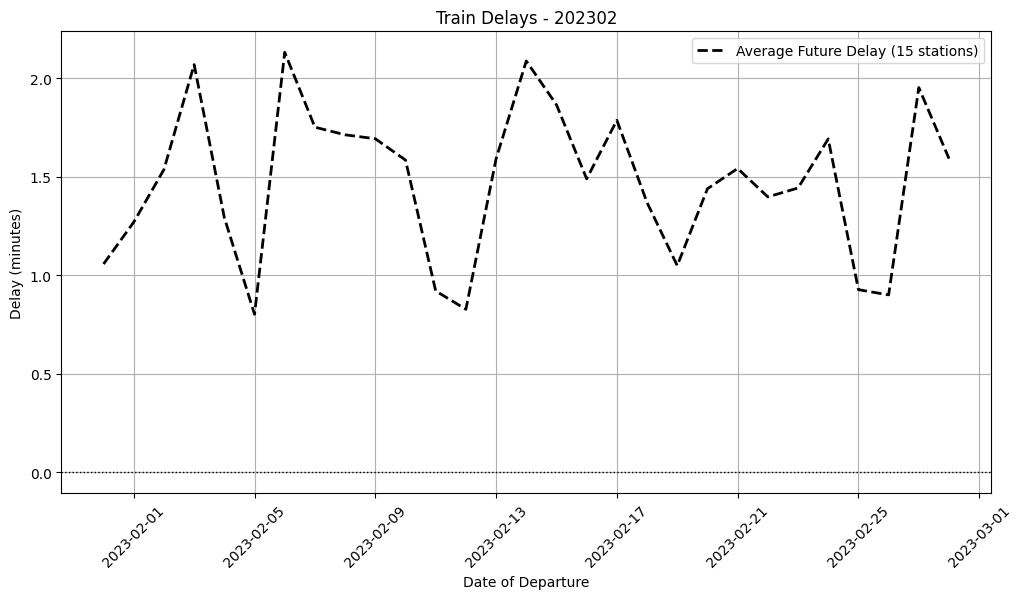

/var/folders/z6/_mfrnglj7h161j5389c53l_m0000gn/T/ipykernel_42337/2945218924.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates_of_departure = pd.to_datetime(md[:, 1], errors="coerce")


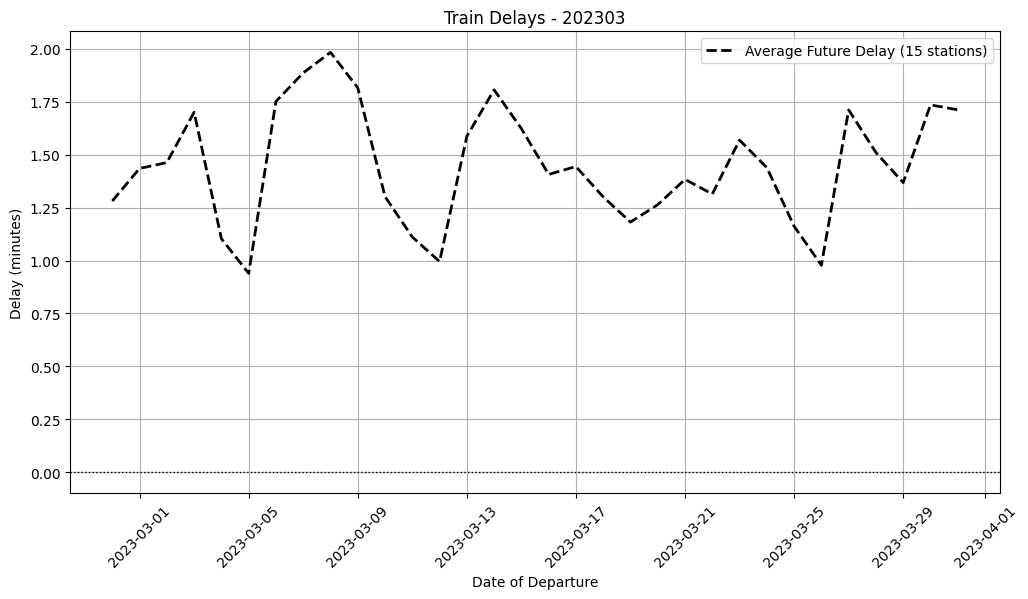

/var/folders/z6/_mfrnglj7h161j5389c53l_m0000gn/T/ipykernel_42337/2945218924.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates_of_departure = pd.to_datetime(md[:, 1], errors="coerce")


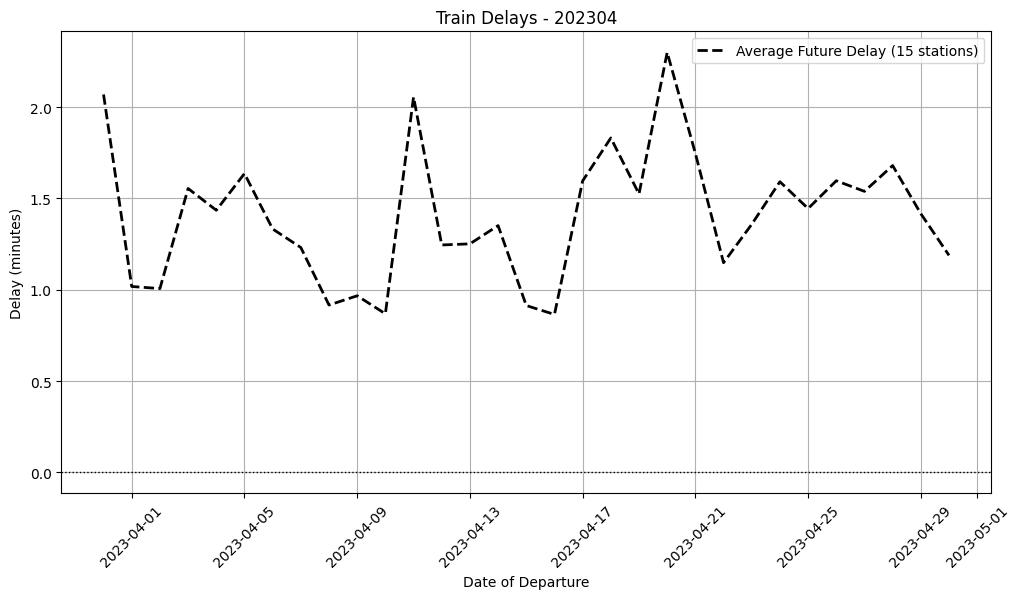

/var/folders/z6/_mfrnglj7h161j5389c53l_m0000gn/T/ipykernel_42337/2945218924.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates_of_departure = pd.to_datetime(md[:, 1], errors="coerce")


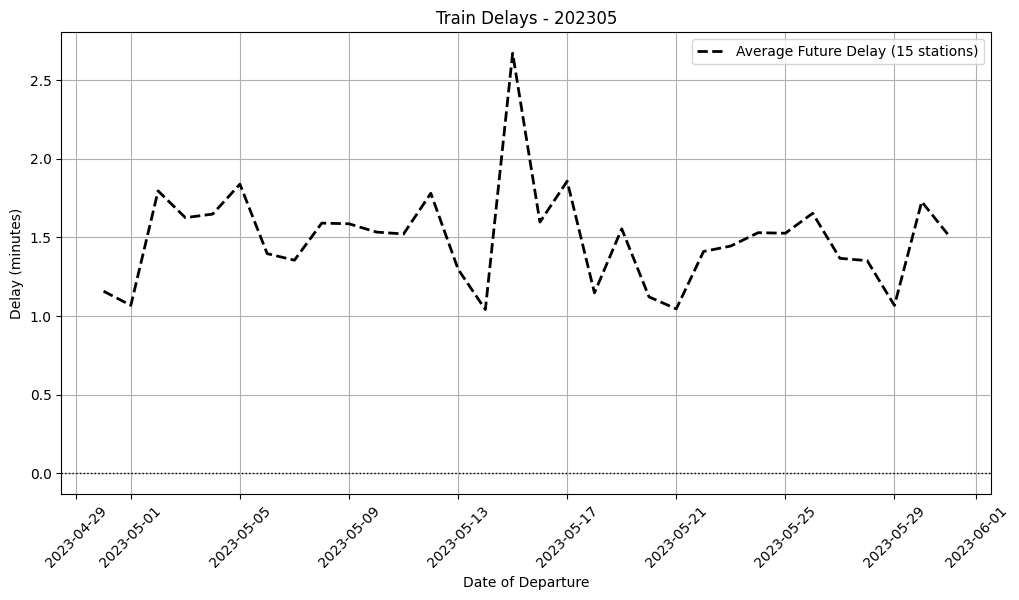

/var/folders/z6/_mfrnglj7h161j5389c53l_m0000gn/T/ipykernel_42337/2945218924.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates_of_departure = pd.to_datetime(md[:, 1], errors="coerce")


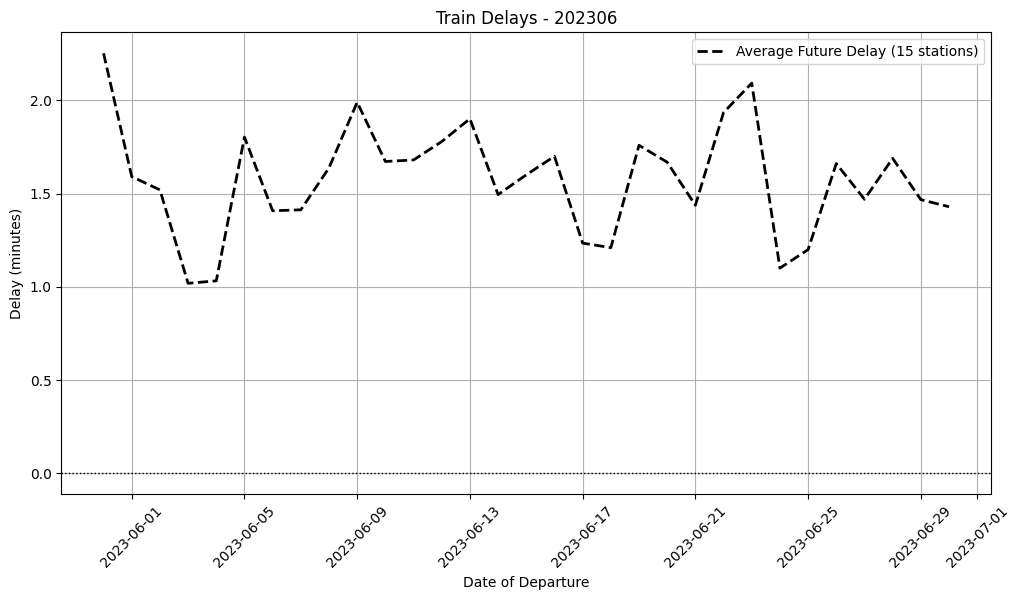

/var/folders/z6/_mfrnglj7h161j5389c53l_m0000gn/T/ipykernel_42337/2945218924.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates_of_departure = pd.to_datetime(md[:, 1], errors="coerce")


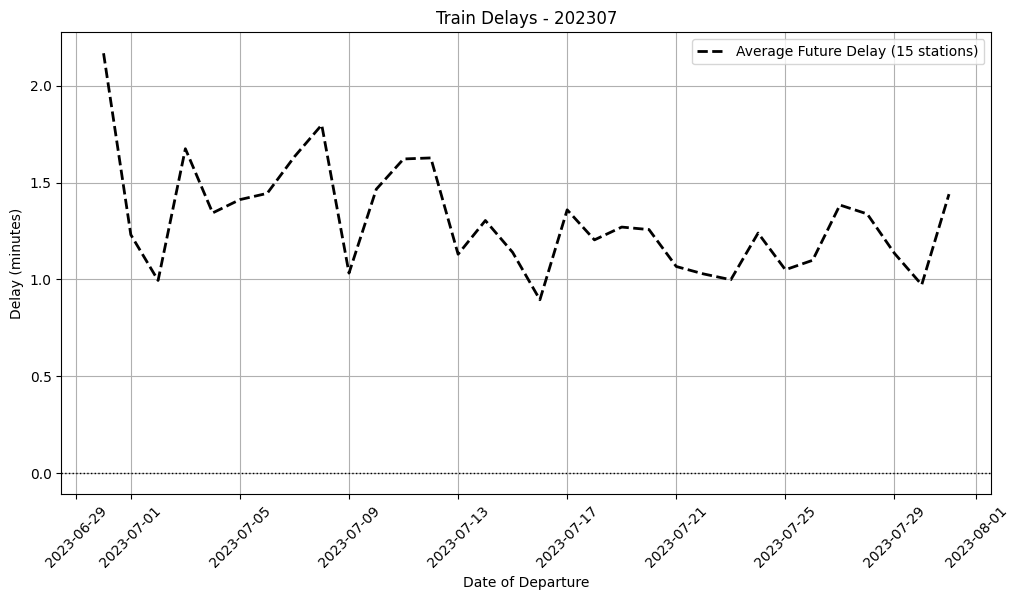

/var/folders/z6/_mfrnglj7h161j5389c53l_m0000gn/T/ipykernel_42337/2945218924.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates_of_departure = pd.to_datetime(md[:, 1], errors="coerce")


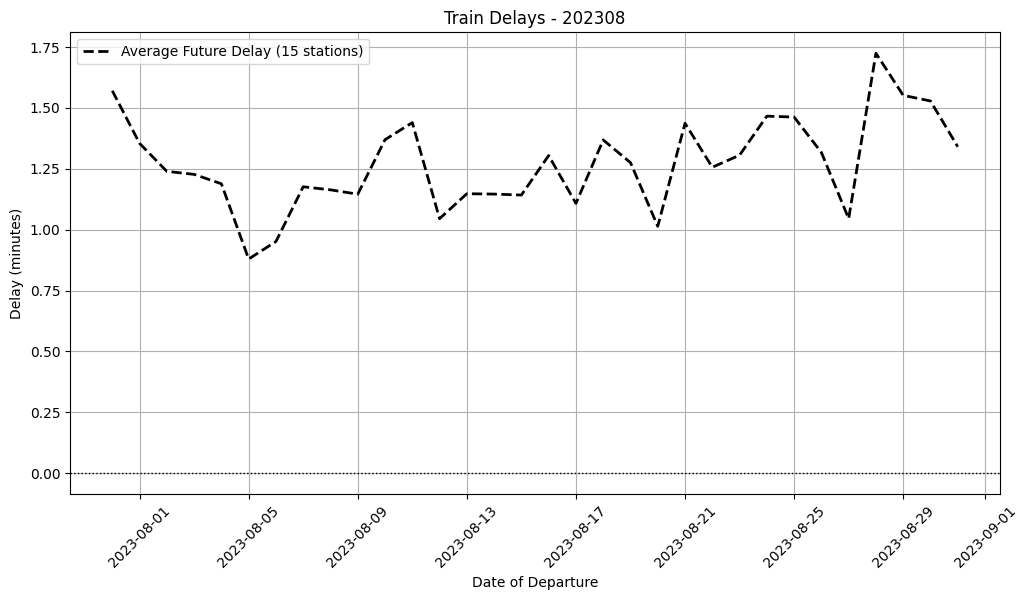

/var/folders/z6/_mfrnglj7h161j5389c53l_m0000gn/T/ipykernel_42337/2945218924.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates_of_departure = pd.to_datetime(md[:, 1], errors="coerce")


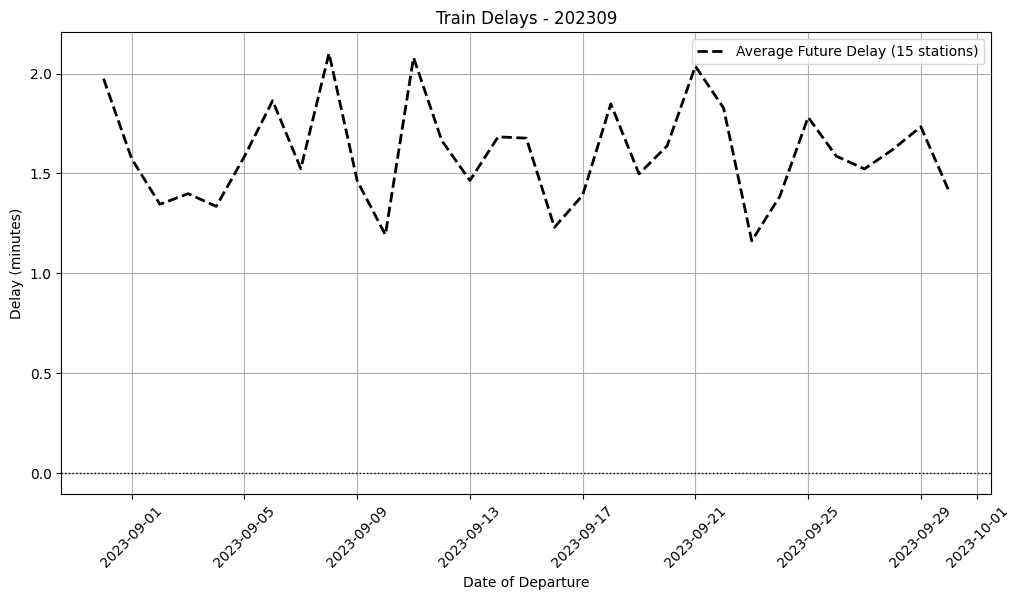

/var/folders/z6/_mfrnglj7h161j5389c53l_m0000gn/T/ipykernel_42337/2945218924.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates_of_departure = pd.to_datetime(md[:, 1], errors="coerce")


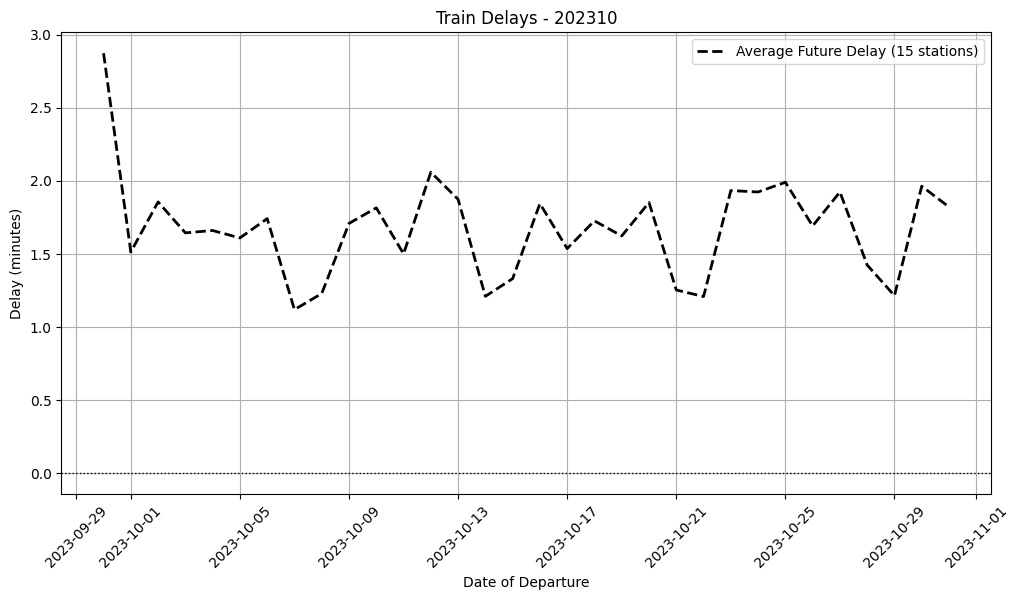

/var/folders/z6/_mfrnglj7h161j5389c53l_m0000gn/T/ipykernel_42337/2945218924.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates_of_departure = pd.to_datetime(md[:, 1], errors="coerce")


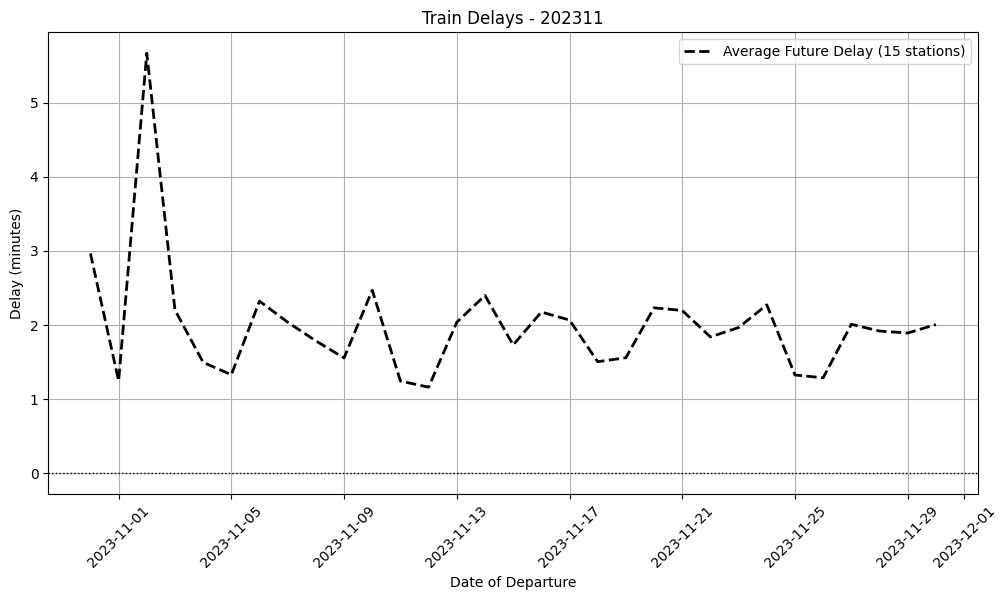

/var/folders/z6/_mfrnglj7h161j5389c53l_m0000gn/T/ipykernel_42337/2945218924.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates_of_departure = pd.to_datetime(md[:, 1], errors="coerce")


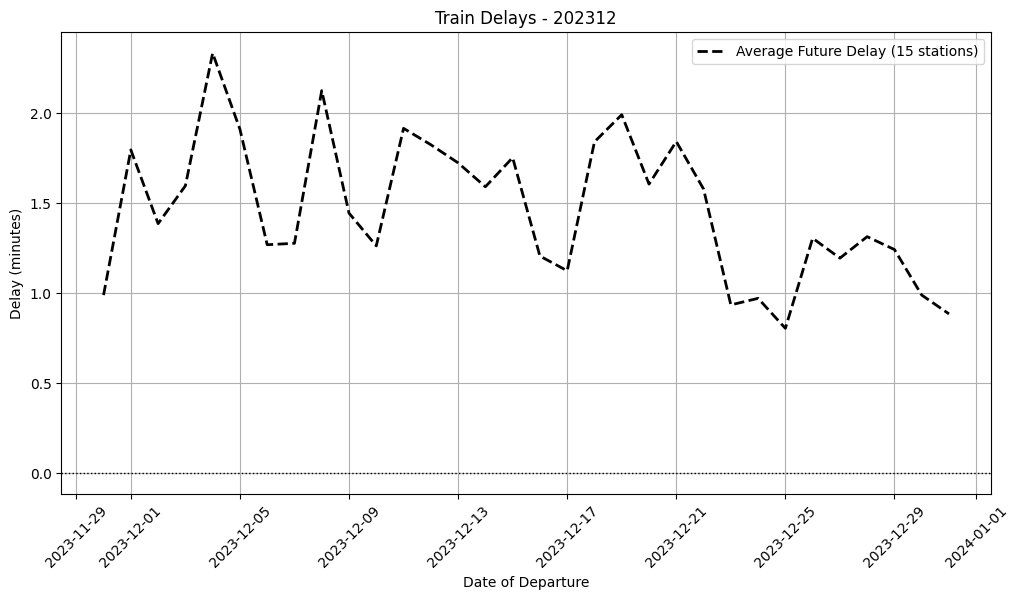

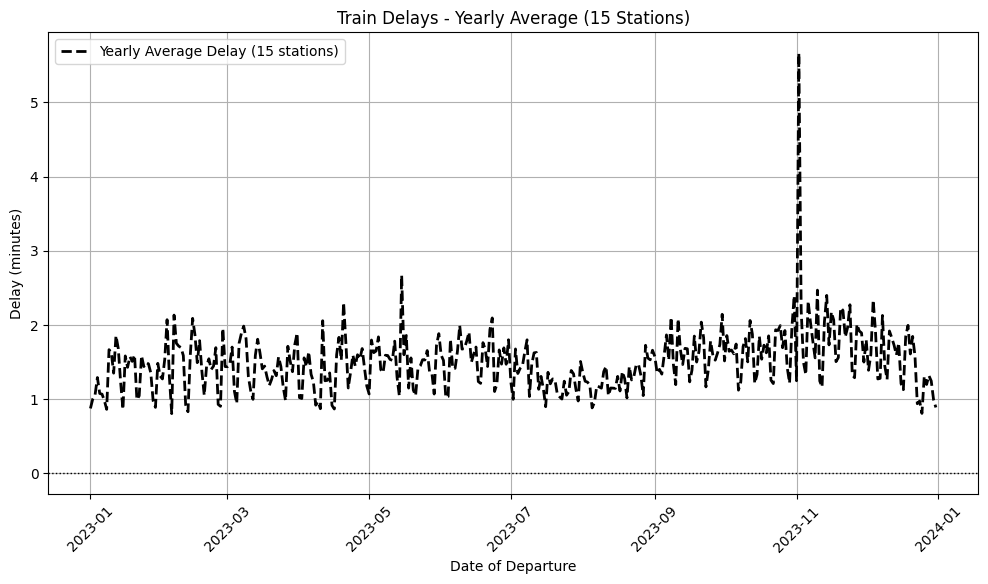

In [ ]:
df_grouped_monthly = {}

for month in months:
    md = md_data[month]
    y_delays = y_delays_data[month]

    dates_of_departure = pd.to_datetime(md[:, 1], errors="coerce")

    avg_future_delay = y_delays.mean(axis=1)

    df_delays = pd.DataFrame({
        "date_of_departure": dates_of_departure,
        "average_future_delay": avg_future_delay,
    })

    df_delays = df_delays.dropna()
    df_grouped = df_delays.groupby("date_of_departure").mean()

    df_grouped_monthly[month] = df_grouped

    plt.figure(figsize=(12, 6))
    plt.plot(df_grouped.index, df_grouped["average_future_delay"], label="Average Future Delay (15 stations)", color="black", linestyle="dashed", linewidth=2)

    plt.axhline(0, color="black", linestyle="dotted", linewidth=1)
    plt.xlabel("Date of Departure")
    plt.ylabel("Delay (minutes)")
    plt.title(f"Train Delays - {month}")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

df_yearly = pd.concat(df_grouped_monthly.values())

df_yearly_grouped = df_yearly.groupby(df_yearly.index).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_yearly_grouped.index, df_yearly_grouped["average_future_delay"], label="Yearly Average Delay (15 stations)", color="black", linestyle="dashed", linewidth=2)

plt.axhline(0, color="black", linestyle="dotted", linewidth=1)
plt.xlabel("Date of Departure")
plt.ylabel("Delay (minutes)")
plt.title("Train Delays - Yearly Average (15 Stations)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

/var/folders/z6/_mfrnglj7h161j5389c53l_m0000gn/T/ipykernel_42337/3052924468.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates_of_departure = pd.to_datetime(md[:, 1], errors="coerce")
/var/folders/z6/_mfrnglj7h161j5389c53l_m0000gn/T/ipykernel_42337/3052924468.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates_of_departure = pd.to_datetime(md[:, 1], errors="coerce")
/var/folders/z6/_mfrnglj7h161j5389c53l_m0000gn/T/ipykernel_42337/3052924468.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates_of_departure = pd.to_datetime(md[:, 1], errors="coerce")
/var

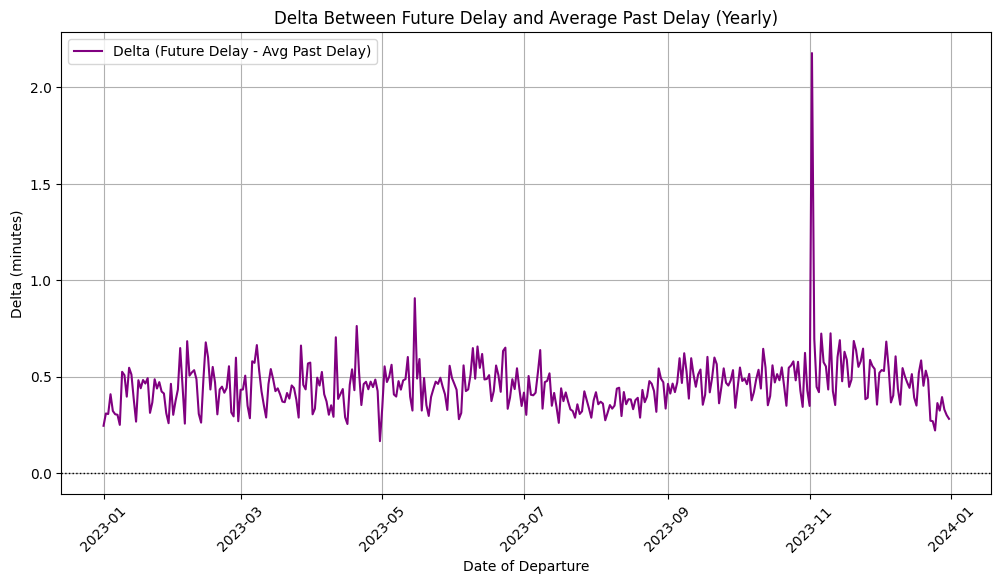

: 

In [ ]:
df_grouped_monthly = {}

for month in months:
    md = md_data[month]
    y_delays = y_delays_data[month]
    x = x_data[month]

    dates_of_departure = pd.to_datetime(md[:, 1], errors="coerce")

    df_deltas = pd.DataFrame({
        "date_of_departure": dates_of_departure,
        "future_delay": y_delays.mean(axis=1),
    })

    past_delay_columns = [f"PAST_DELAYS_{i}" for i in range(1, 6) if f"PAST_DELAYS_{i}" in columns_scheme['x']]
    for col in past_delay_columns:
        df_deltas[col] = x[:, columns_scheme['x'][col]]

    df_deltas["average_past_delay"] = df_deltas[past_delay_columns].mean(axis=1)

    df_deltas["delta"] = df_deltas["future_delay"] - df_deltas["average_past_delay"]

    df_deltas = df_deltas.dropna()
    df_grouped = df_deltas.groupby("date_of_departure").mean()

    df_grouped_monthly[month] = df_grouped

df_yearly = pd.concat(df_grouped_monthly.values())

df_yearly_grouped = df_yearly.groupby(df_yearly.index).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_yearly_grouped.index, df_yearly_grouped["delta"], label="Delta (Future Delay - Avg Past Delay)", color="purple")

plt.axhline(0, color="black", linestyle="dotted", linewidth=1) 
plt.xlabel("Date of Departure")
plt.ylabel("Delta (minutes)")
plt.title("Delta Between Future Delay and Average Past Delay (Yearly)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### End of the data visualization. Feel free to explore the results.ipynb notebook to understand our results, and explore the other notebooks for details about each model.